# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

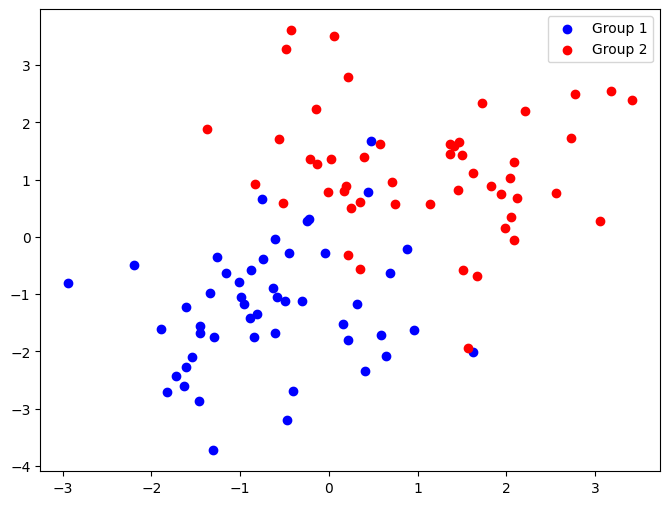

In [3]:
group1_x1 = np.random.normal(size=50, loc=-1)
group1_x2 = np.random.normal(size=50, loc=-1)

group2_x1 = np.random.normal(size=50, loc=1)
group2_x2 = np.random.normal(size=50, loc=1)

X = np.array([
    np.concatenate([group1_x1, group2_x1]),
    np.concatenate([group1_x2, group2_x2])
]).T
y = np.concatenate([np.zeros(50), np.ones(50)])

plt.figure(figsize=(8, 6))
plt.scatter(group1_x1, group1_x2, color="blue", label="Group 1")
plt.scatter(group2_x1, group2_x2, color="red", label="Group 2")
plt.legend()
plt.show()

# Model

In [21]:
class KNNClassifier():
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = np.array([self._predict(x) for x in X])
        return predictions

    def _predict(self, x):
        # compute the distances
        distances = [self.euqlidean_distance(x, x_train) for x_train in self.X_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # most samples
        unique, counts = np.unique(k_nearest_labels, return_counts=True)
        most_common = unique[np.argmax(counts)]
        return most_common

    @staticmethod
    def euqlidean_distance(point1, point2):
        distance = np.sqrt(np.sum((point1-point2)**2))
        return distance

# Train

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KNNclasScretch = KNNClassifier(3)
KNNclasScretch.fit(X_train, y_train)

# Evaluation

In [24]:
from sklearn.metrics import accuracy_score

y_pred = KNNclasScretch.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100}%")

Accuracy: 95.0%
